## Ch9 進階字串處理 (Advanced String Processing)
### 9-1　ASCII encoding
#### 9-1-1　module string

In [1]:
from IPython.display import Image

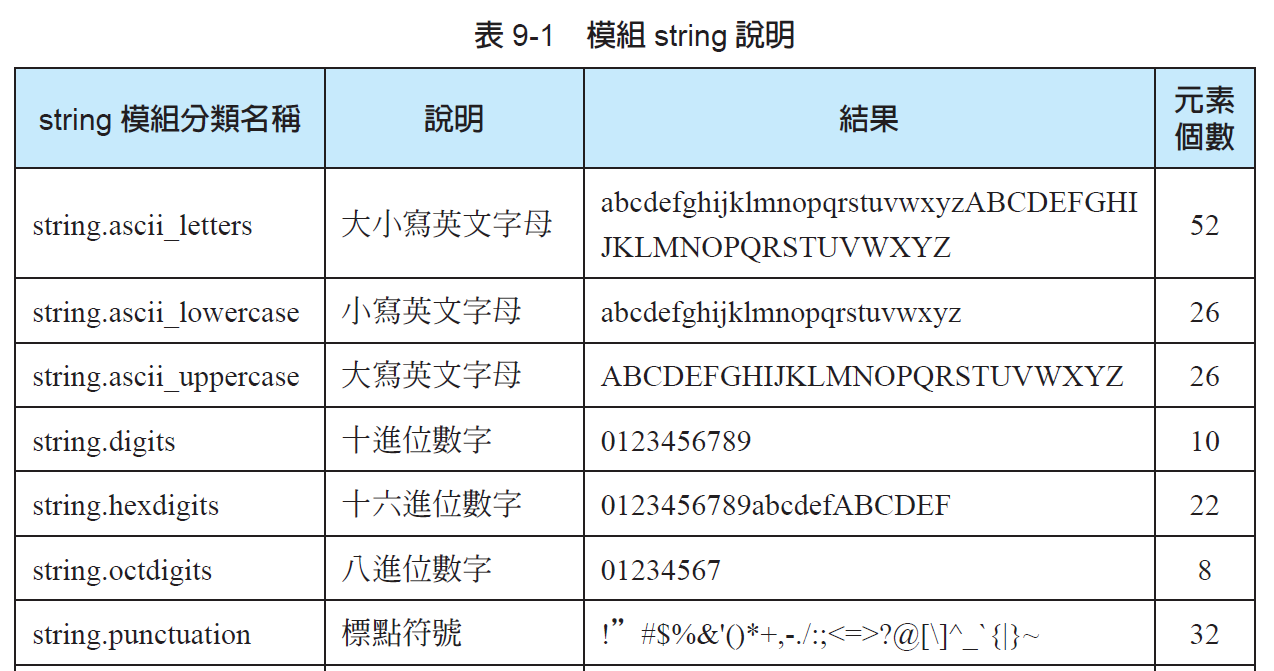

In [2]:
Image('images/9-1-1-a.png', width=600, height=None)

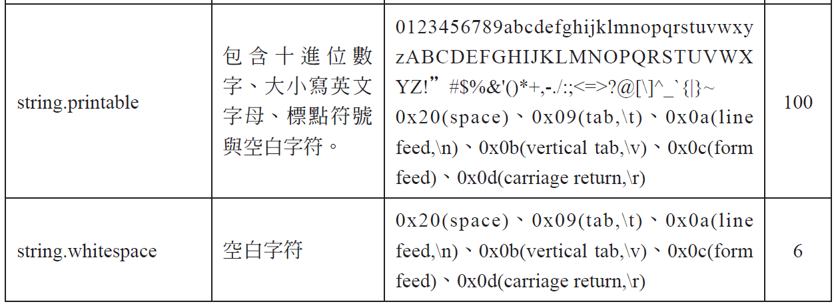

In [3]:
Image('images/9-1-1-b.png', width=600, height=None)

In [4]:
import string

print('ascii_letters:', string.ascii_letters)
print('ascii_lowercase:', string.ascii_lowercase)
print('ascii_uppercase:', string.ascii_uppercase)
print('digits:', string.digits)
print('hexdigits:', string.hexdigits)
print('octdigits:', string.octdigits)
print('punctuation:', string.punctuation)
print("printable.encode('ascii'):", string.printable.encode('ascii'))
print("whitespace.encode('ascii'):", string.whitespace.encode('ascii'))

ascii_letters: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
ascii_lowercase: abcdefghijklmnopqrstuvwxyz
ascii_uppercase: ABCDEFGHIJKLMNOPQRSTUVWXYZ
digits: 0123456789
hexdigits: 0123456789abcdefABCDEF
octdigits: 01234567
punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
printable.encode('ascii'): b'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'
whitespace.encode('ascii'): b' \t\n\r\x0b\x0c'


### (9-1-2-密碼隨機產生器.py)  9-1-2　Password generation

In [5]:
import string
import random

chs = string.ascii_letters + string.digits
pwd=""
# Generate password with 8-12 characters
for x in range(random.randint(8,12)):
    pwd += random.choice(chs)
print(pwd)

AuSuRRzJ


## 9-2　Unicode 編碼
### 9-2-1　Unicode 字元的表示

In [6]:
import unicodedata

# Get full unicode name for value
def unicode_name(value):
    name = unicodedata.name(value)
    print(f'value= {value}, name= {name}')
    return name

# Return value of a gve unicode name
def unicode_lookup(name):
    value = unicodedata.lookup(name)
    print(f'name= {name}, value= {value}\n')
    return value

#  name: unicode 完整編碼, value: 字元(or 字元編碼)
name = unicode_name('我')
value = unicode_lookup(name)

# \u: using four hex digits for value
name = unicode_name('\u6211')
value = unicode_lookup(name)

# \U: using 8 hex digits for value
name = unicode_name('\U00006211')
value = unicode_lookup(name)

# # \N: using character name for value
name = unicode_name('\N{CJK UNIFIED IDEOGRAPH-6211}')
value = unicode_lookup(name)

value= 我, name= CJK UNIFIED IDEOGRAPH-6211
name= CJK UNIFIED IDEOGRAPH-6211, value= 我

value= 我, name= CJK UNIFIED IDEOGRAPH-6211
name= CJK UNIFIED IDEOGRAPH-6211, value= 我

value= 我, name= CJK UNIFIED IDEOGRAPH-6211
name= CJK UNIFIED IDEOGRAPH-6211, value= 我

value= 我, name= CJK UNIFIED IDEOGRAPH-6211
name= CJK UNIFIED IDEOGRAPH-6211, value= 我



### (9-2-2-編碼與解碼.py)  9-2-2: 編碼 (encode) 與 解碼 (decode)

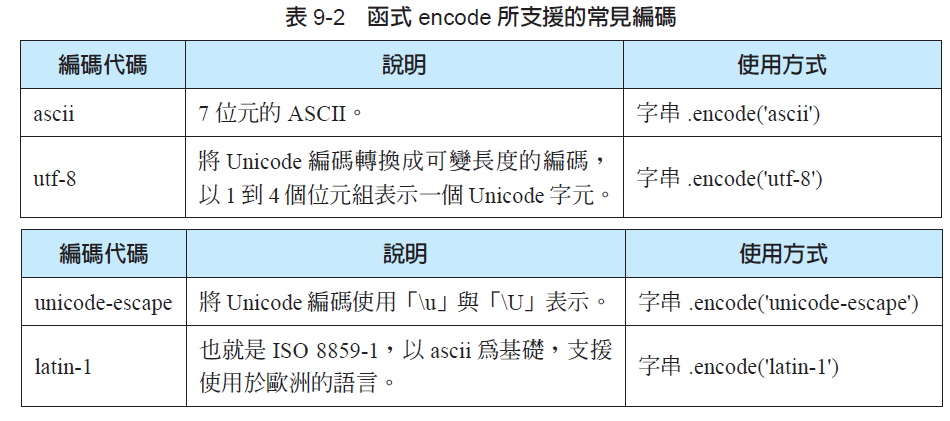

In [98]:
Image('images/9-2-2.png', width=600, height=None)

In [8]:
print('我'.encode('unicode-escape'))

def utf8(data):
    data_byte = data.encode('utf-8')  # 編碼
    data2 = data_byte.decode('utf-8') # 解碼 
    print(f'\n{data} after utf-8 encoding: {data_byte}')
    print(data_byte, 'after utf-8 decoding:', data2)
    print(f"{data}: length {len(data)}")
    print(f"{data_byte}: length {len(data_byte)}")

utf8('我')
utf8("\u6211")

b'\\u6211'

我 after utf-8 encoding: b'\xe6\x88\x91'
b'\xe6\x88\x91' after utf-8 decoding: 我
我: length 1
b'\xe6\x88\x91': length 3

我 after utf-8 encoding: b'\xe6\x88\x91'
b'\xe6\x88\x91' after utf-8 decoding: 我
我: length 1
b'\xe6\x88\x91': length 3


## 9-3　正規表示式(regular expression)
### 9-3-1 module `re` for finding matched patterns

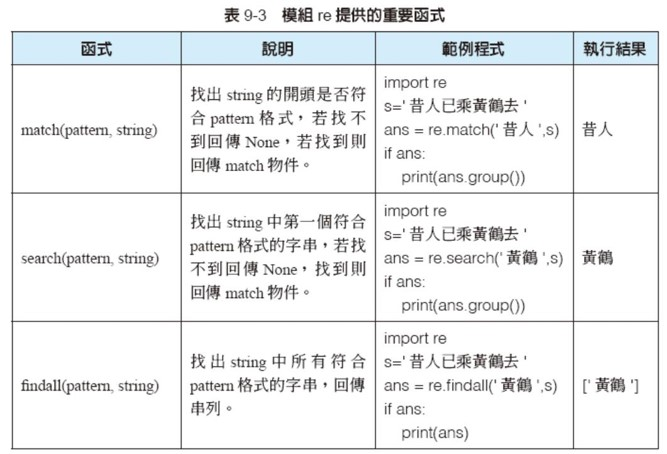

In [9]:
Image('images/9-3-1-a.jpg', width=480, height=320)

re.match(pattern, string): determine if the `beginning` of a string matches a specified pattern

In [11]:
import re

s = '昔人已乘黃鶴去，此地空余黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠。'
print(s+'\n')

# https://regex101.com/r/1rdEQP/1
# re.match(pattern, string):  
# if string starts with the patten, return match object, else return None
ans = re.match('昔人',s)
if ans:
    print("match found:", ans.group())      # .group(): return matched content
    print("match found at:",  ans.span())   # .span():  return matched content start and end positions
    print("original string:",  ans.string)  # .string:  original string
else:
    print("找不到開頭是「昔人」")


昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。

match found: 昔人
match found at: (0, 2)
original string: 昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。


In [12]:
# If the string starts with '黃鶴'
print(s+'\n')
ans = re.match('黃鶴',s)
if ans:
    print(ans.group())
else:
    print("找不到開頭是「黃鶴」\n")

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。

找不到開頭是「黃鶴」



In [ ]:
# find if the string starts with any number * of any characters and also "黃鶴"
print(s+'\n')
ans = re.match('.*黃鶴',s)  # .* (greedy, as many as possible), .*? (lazy, as few as possible)
if ans:
    print(ans.group())
else:
    print("找不到開頭是「.*黃鶴」")

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴


+ . -> any character
+ \* -> multiple (0..n)
+ ? -> lazy

In [104]:
# .* (greedy, as many as possible) vs. .*? (lazy, as few as possible)
# find if the string starts any number of any characters and also "黃鶴"
ans = re.match('.*黃鶴',s)  # .* (greedy, as many as possible)
if ans:
    print(ans.group())
else:
    print("找不到開頭是「.*黃鶴」")

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴


re.search(pattern, string): search the entire string for the first location where the  pattern matches

In [13]:
# re.search(pattern, string): 找出string中第一個符合patten的字串。
# find the first substring that matches the pattern
print(s)
ans = re.search('黃鶴',s)
if ans:
    print(ans.group())
    print(ans.span())
else:
    print("找不到「黃鶴」")

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
黃鶴
(4, 6)


re.findall(pattern, string): searches the entire string for all non-overlapping matches of the specified pattern and returns them as a list.

In [34]:
# https://regex101.com/r/y1DjuY/1
# re.findall(pattern, string): 找出string中所有符合patten的字串。
# Finds all substrings that match the pattern; returns a list in matching order
print(s)
ans = re.findall('黃鶴',s)
if ans:
    print(ans)
else:
    print("找不到「黃鶴」")

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
['黃鶴', '黃鶴', '黃鶴']


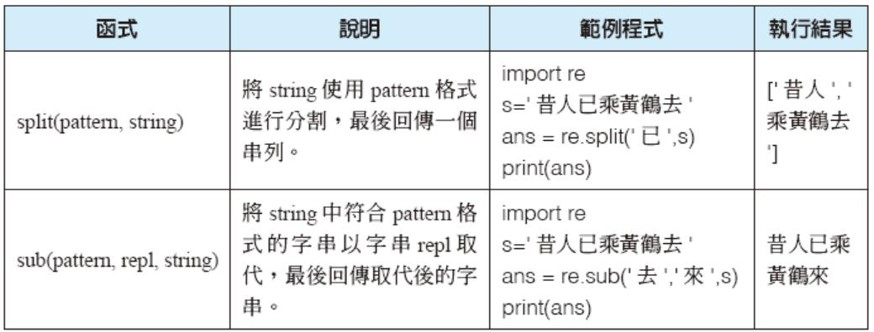

In [107]:
Image('images/9-3-1-b.jpg', width=480, height=None)


re.split(pattern, string): splits the string at the occurrences of the pattern and returns a list of the resulting substrings.

In [14]:
# re.split(pattern, string): 依照patten分割string字串成一個 list。
# split the string by the occurrences of the regex pattern and returns a list of the resulting substrings.
s = '昔人已乘黃鶴去，此地空余黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠。'
print(s+'\n')

ans = re.split('，', s)
print("re.split('，', s):", ans)
print()

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。

re.split('，', s): ['昔人已乘黃鶴去', '此地空余黃鶴樓。黃鶴一去不復返', '白雲千載空悠悠。']



split by multiple delimiters

In [16]:
import re

# Sample string
s = 'apple，banana;cherry|date'

# Pattern to split by multiple delimiters: ，, ;, and |
pattern = r'[，;|]'

# Split the string
result = re.split(pattern, s)

print(result)


['apple', 'banana', 'cherry', 'date']


re.sub(pattern, repl, string): replaces all occurrences of the pattern in the string with the replacement repl and returns the modified string.

In [15]:
# https://regex101.com/r/kRFsen/1
# re.sub(pattern, repl, string): 將string字串中符合patten部分，以 repl 取代。
# re.sub() searches for the pattern in the string and replaces the matched syb]]substrings with the replacement (repl).
ans = re.sub('。', '；', s)
print("re.sub('。', '；', s):", ans)

ans = re.sub('[。，]', '；', s)  # multiple patterns
print("re.sub('[。，]', '；', s):", ans)

re.sub('。', '；', s): 昔人已乘黃鶴去，此地空余黃鶴樓；黃鶴一去不復返，白雲千載空悠悠；
re.sub('[。，]', '；', s): 昔人已乘黃鶴去；此地空余黃鶴樓；黃鶴一去不復返；白雲千載空悠悠；


### 9-3-2　正規表示式的元字符 Metacharacters or Special Sequences in Regular expressions
#### (9-3-2a-正規表示式的元字符.py)
#### (9-3-2b-正規表示式的元字符.py) metacharacters

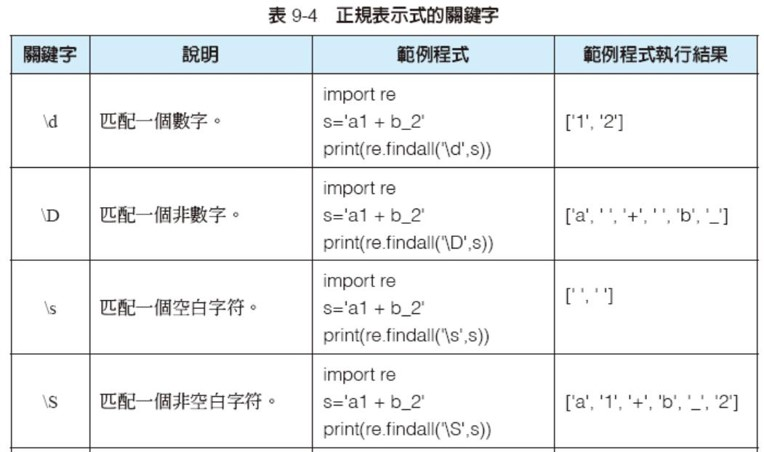

In [110]:
Image('images/9-3-2-a1.jpg', width=480, height=None)

In [17]:
import string
import re

pr = string.printable

# https://regex101.com/r/ZugBtA/1
# \d matches a digit (equivalent to [0-9])
# \D matches non-digit character (equivalent to [^0-9])
print("\d     digits:", re.findall('\d', pr))
print("\D non-digits:", re.findall('\D', pr))
print()

\d     digits: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
\D non-digits: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']



In [18]:
# \s matches any whitespace character (equivalent to [\r\n\t\f\v  ])
# \S matches any non-whitespace character (equivalent to [^\r\n\t\f\v ])
print("\s     whitespace:", re.findall('\s', pr))
print("\S non-whitespace:", re.findall('\S', pr))
print()


\s     whitespace: [' ', '\t', '\n', '\r', '\x0b', '\x0c']
\S non-whitespace: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']



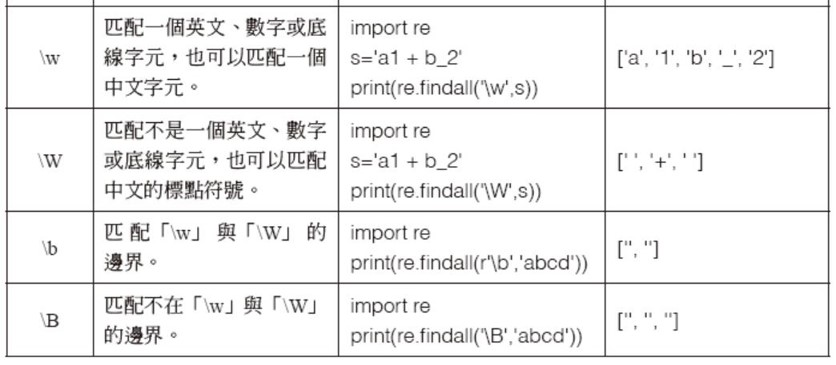

In [19]:
Image('images/9-3-2-a2.jpg', width=480, height=None)

In [20]:
# \w matches any alphanumeric character (letters, digits, or underscores)
# \w equivalent to [a-zA-Z0-9_]
# \W matches any non-word character (equivalent to [^a-zA-Z0-9_])
print("\w     letters, digits, or underscores:", re.findall('\w', pr))
print("\W Not(letters, digits, or underscores):", re.findall('\W', pr))
print()

\w     letters, digits, or underscores: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_']
\W Not(letters, digits, or underscores): ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']



In [22]:
# https://regex101.com/r/B9k9lt/1
# \b assert position at a word boundary: (^\w|\w$|\W\w|\w\W)
# \B assert position where \b does not match
print(r"\b assert any position at word boundary re.findall(r'\b','abcd'):", re.findall(r'\b','abcd'))
print(r"\b 符合\w, \W, 在開頭或結尾 re.findall(r'\ba','abcd'):", re.findall(r'\ba','abcd'))
print(r"\b 符合\w, \W, 在開頭或結尾 re.findall(r'd\b','abcd'):", re.findall(r'd\b','abcd'))
print("\B assert any position not at word boundary re.findall('\B','abcd'):", re.findall('\B','abcd'))
print("\B 符合\w, \W, 不在開頭或結尾 re.findall('\Bb','abcd'):", re.findall('\Bb','abcd'))
print("\B 符合\w, \W, 不在開頭或結尾 re.findall('c\B','abcd'):", re.findall('c\B','abcd'))
print()

\b assert any position at word boundary re.findall(r'\b','abcd'): ['', '']
\b 符合\w, \W, 在開頭或結尾 re.findall(r'\ba','abcd'): ['a']
\b 符合\w, \W, 在開頭或結尾 re.findall(r'd\b','abcd'): ['d']
\B assert any position not at word boundary re.findall('\B','abcd'): ['', '', '']
\B 符合\w, \W, 不在開頭或結尾 re.findall('\Bb','abcd'): ['b']
\B 符合\w, \W, 不在開頭或結尾 re.findall('c\B','abcd'): ['c']



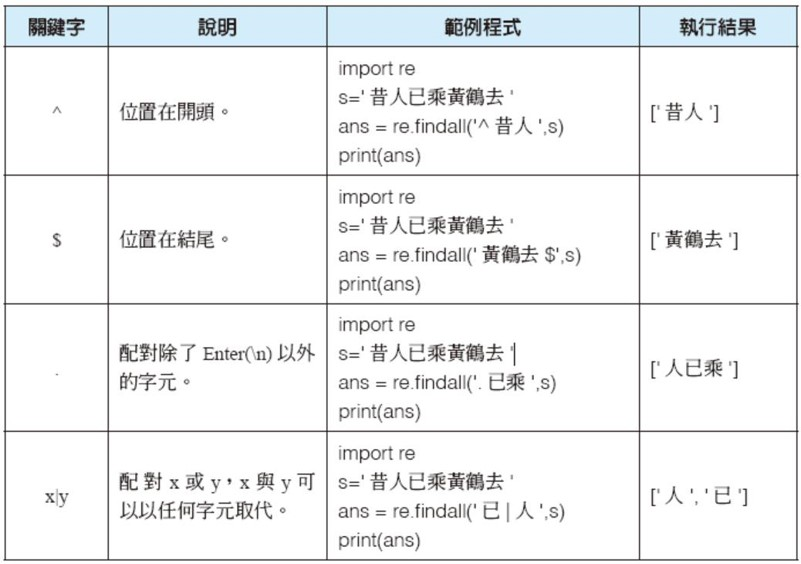

In [116]:
Image('images/9-3-2-b1.jpg', width=480, height=None)

In [117]:
import re
s='昔人已乘黃鶴去，此地空余黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠。'
print(s)

# https://regex101.com/r/hUiS3O/1

# ^pattern 在字串開頭, Matches the start of the string
ans = re.findall('^昔人', s)
print("re.findall('^昔人', s):", ans)
print()

# pattern$ 在字串結尾 Matches the end of the string
ans = re.findall('空悠悠。$', s)
print("re.findall('空悠悠。$', s):", ans)
print()

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.findall('^昔人', s): ['昔人']

re.findall('空悠悠。$', s): ['空悠悠。']



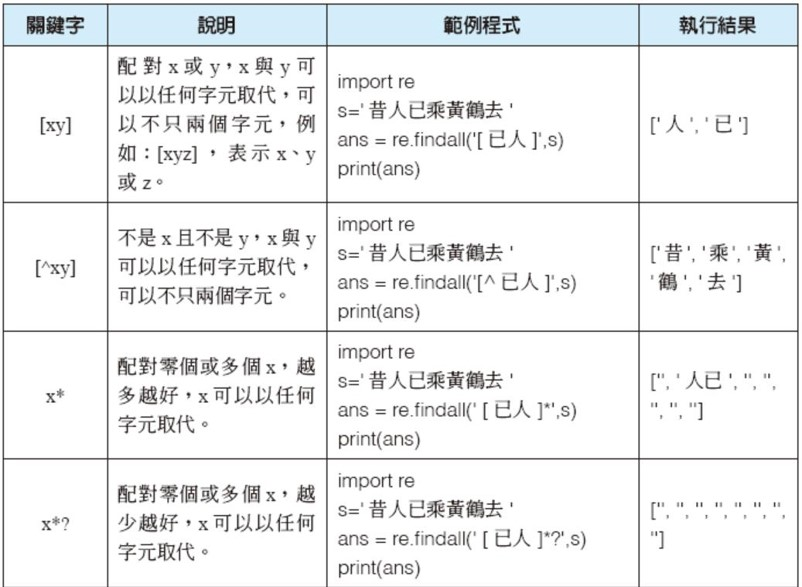

In [118]:
Image('images/9-3-2-b2.jpg', width=480, height=None)

In [23]:
s='昔人已乘黃鶴去，此地空余黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠。'
print(s)

昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。


In [24]:
# [xy]: x or y
ans = re.findall('[黃白]', s)
print("re.findall('[黃白]', s):", ans)
print()

# [^xy]: not (x or y) = not x  and  not y
ans = re.findall('[^黃白]', s)
print("re.findall('[^黃白]', s):", ans)
print()

re.findall('[黃白]', s): ['黃', '黃', '黃', '白']

re.findall('[^黃白]', s): ['昔', '人', '已', '乘', '鶴', '去', '，', '此', '地', '空', '余', '鶴', '樓', '。', '鶴', '一', '去', '不', '復', '返', '，', '雲', '千', '載', '空', '悠', '悠', '。']



#### ? vs. \* vs. \*?

In [ ]:
# re.findall(pattern, str): 
# Return all non-overlapping matches of pattern in string, as a list of strings
# Empty matches are included in the result unless they touch the beginning of another match
# This means if an empty match is immediately followed by an existing non-empty match, the empty match is not included.
# check out at regex101.com

import re

s='昔人已乘黃鶴去'
print("s = ", s)
print()

# https://regex101.com/r/ooGfUR/1
# [xy]?: 0 or 1 x (or y), 含空字串 (lazy)
# [xy]?: Zero or one occurrence of x or y, including empty strings
ans = re.findall('[人已]?', s)
print("re.findall('[人已]?', s):", len(ans), ans)
print()

s =  昔人已乘黃鶴去

re.findall('[人已]?', s): 8 ['', '人', '已', '', '', '', '', '']



In [122]:
# [xy]*: 0 或 多個 x or y, 長字串優先 (greedy)
# [xy]*: Zero or multiple occurrences of x or y, as many times as possible
print("s = ", s)
ans = re.findall('[人已]*', s)
print("re.findall('[人已]*', s):", len(ans), ans)
print()

s =  昔人已乘黃鶴去
re.findall('[人已]*', s): 7 ['', '人已', '', '', '', '', '']



In [123]:
# [xy]*?: 0 或 多個 x or y, 短字串優先(含空字串, lazy)
# [xy]*?: Zero or multiple occurrences of x or y, as few times as possible
print("s = ", s)
ans = re.findall('[人已]*?', s)
print("re.findall('[人已]*?', s):", len(ans), ans)
print()

s =  昔人已乘黃鶴去
re.findall('[人已]*?', s): 10 ['', '', '人', '', '已', '', '', '', '', '']



In [25]:
# re.findall(pattern, str): 
# Return all non-overlapping matches of pattern in string, as a list of strings

import re

s='昔人已乘黃鶴去，此地空餘黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠。'
print("s = ", s)
print()

# https://regex101.com/r/ooGfUR/1
# ?: 0 或 1 個「一」or「去」, 含空字串 (lazy)
ans = re.findall('[一去]?', s)
print("re.findall('[一去]?', s):", len(ans), ans)
print()

# *: 0 或 多個「一」or「去」, 長字串優先 (greedy)
ans = re.findall('[一去]*', s)
print("re.findall('[一去]*', s):", len(ans), ans)
print()

# *?: 0 或 多個 「一」or「去」, 短字串優先(含空字串, lazy)
ans = re.findall('[一去]*?', s)
print("re.findall('[一去]*?', s):", len(ans), ans)
print()

s =  昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。

re.findall('[一去]?', s): 33 ['', '', '', '', '', '', '去', '', '', '', '', '', '', '', '', '', '', '', '一', '去', '', '', '', '', '', '', '', '', '', '', '', '', '']

re.findall('[一去]*', s): 32 ['', '', '', '', '', '', '去', '', '', '', '', '', '', '', '', '', '', '', '一去', '', '', '', '', '', '', '', '', '', '', '', '', '']

re.findall('[一去]*?', s): 36 ['', '', '', '', '', '', '', '去', '', '', '', '', '', '', '', '', '', '', '', '', '一', '', '去', '', '', '', '', '', '', '', '', '', '', '', '', '']



#### \w (letters, digits, and underscores) vs \W (Match no-word character)

In [28]:
s = '昔人已乘黃鶴去，此地空余黃鶴樓。\
黃鶴一去不復返，白雲千載空悠悠_。'

# https://regex101.com/r/e4nb95/1
# \w: 字母, 數字或底線 ([a-zA-Z0-9_])
ans = re.findall('\w', s)
print("re.findall('\w', s):", len(ans), ans)
print()

# \w: 字母, 數字或底線, *: 0 or multiple occurrences, greedy
ans = re.findall('\w*', s)
print("re.findall('\w*', s):", len(ans), ans)
print()

re.findall('\w', s): 29 ['昔', '人', '已', '乘', '黃', '鶴', '去', '此', '地', '空', '余', '黃', '鶴', '樓', '黃', '鶴', '一', '去', '不', '復', '返', '白', '雲', '千', '載', '空', '悠', '悠', '_']

re.findall('\w*', s): 9 ['昔人已乘黃鶴去', '', '此地空余黃鶴樓', '', '黃鶴一去不復返', '', '白雲千載空悠悠_', '', '']



In [29]:
# https://regex101.com/r/GLNPtv/1

s='昔人已乘黃鶴去，此地空余黃鶴樓。黃鶴一去不復返，白雲千載空悠悠_。'

# \W: 非(字母, 數字或底線), any non-word characters [^a-zA-Z0-9_]
ans = re.findall('\W', s)
print("re.findall('\W', s):", ans)
print()

# [^\W_]: not(not word characters or _) -> word characters and not _
# [^\W_]: word characters (with _) and not _
ans = re.findall('[^\W_]', s)
print("re.findall('[^\W_]', s):", ans)
print()

re.findall('\W', s): ['，', '。', '，', '。']

re.findall('[^\W_]', s): ['昔', '人', '已', '乘', '黃', '鶴', '去', '此', '地', '空', '余', '黃', '鶴', '樓', '黃', '鶴', '一', '去', '不', '復', '返', '白', '雲', '千', '載', '空', '悠', '悠']



In [30]:
# str\W: str之後有非字母, 數字或底線, non-word character following str
ans = re.findall('黃鶴樓\W', s)
print("re.findall('黃鶴樓\W', s):", ans)
print()

# str.\W: str之後有其他字元，再有非(字母, 數字)或底線字元
# str followed by .: any character and \W: non-word character
ans = re.findall('黃鶴.\W', s)
print("re.findall('黃鶴.\W', s):", ans)
print()

re.findall('黃鶴樓\W', s): ['黃鶴樓。']

re.findall('黃鶴.\W', s): ['黃鶴去，', '黃鶴樓。']



In [128]:
# .*(str).\W: str之前有字串(長字串優先, greedy), 之後有其他字，再有非字母, 數字或底線
# (str): capturing group 擷取群組

matches = re.finditer('.*(黃鶴).\W', s)
print("re.finditer('.*(黃鶴).\W', s):")
for m in matches:
  print(m.groups(), m.group(0), m.group(1))
print()
# groups(): all matched values
# group(0): the matched string (= group())
# group(1): the first capturing group

re.finditer('.*(黃鶴).\W', s):
('黃鶴',) 昔人已乘黃鶴去，此地空余黃鶴樓。 黃鶴



In [129]:
# .*?(str).\W: str之前有字串(短字串優先,lazy), 之後有其他字，再有非字母, 數字或底線
matches = re.finditer('.*?(黃鶴).\W', s)
print("re.finditer('.*?(黃鶴).\W', s):")
for m in matches:
  print(m.groups(), m.group(0), m.group(1))

re.finditer('.*?(黃鶴).\W', s):
('黃鶴',) 昔人已乘黃鶴去， 黃鶴
('黃鶴',) 此地空余黃鶴樓。 黃鶴


#### Difference between re.findall() and re.finditer()

In [31]:
# re.finditer() returns iterator of matched objects in the string
finditer_results = re.finditer('.*?(黃鶴).\W', s)
print(type(finditer_results))
print("re.finditer('.*?(黃鶴).\W', s):")
for m in finditer_results:
  print(m.groups(), m.group(0), m.group(1))
print()

# re.findall() returns list of matched patterns in string
findall_results = re.findall('(.*?(黃鶴).\W)', s)
print(type(findall_results))
print("re.findall('(.*?(黃鶴).\W)', s):")
for result in findall_results:
  print(result)

<class 'callable_iterator'>
re.finditer('.*?(黃鶴).\W', s):
('黃鶴',) 昔人已乘黃鶴去， 黃鶴
('黃鶴',) 此地空余黃鶴樓。 黃鶴

<class 'list'>
re.findall('(.*?(黃鶴).\W)', s):
('昔人已乘黃鶴去，', '黃鶴')
('此地空余黃鶴樓。', '黃鶴')


### (9-3-2c-正規表示式的關鍵字.py) more metacharacters

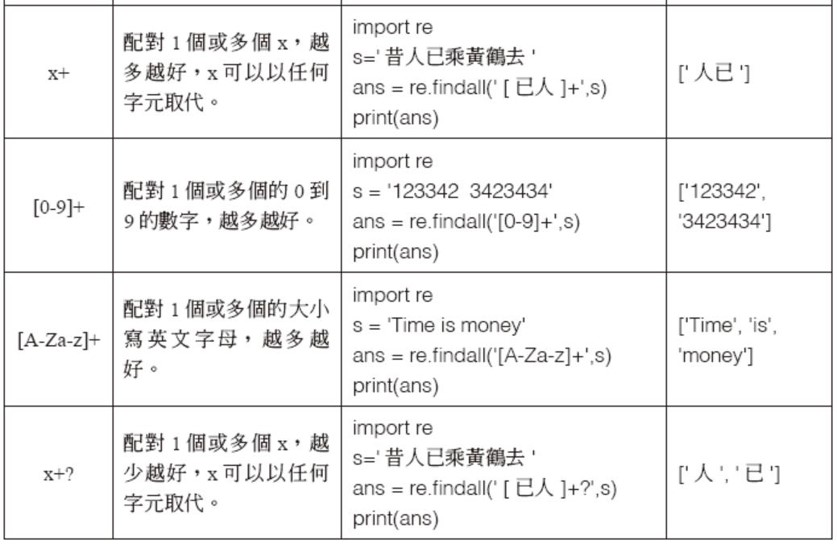

In [32]:
Image('images/9-3-2-c1.jpg', width=480, height=None)

In [ ]:
# https://www.gcptutorials.com/article/difference-between-re.findall-and-re.finditer

import re

text = ''' Extract the domain from the urls www.gcptutorials.com,
www#wikipedia.org, www.google.123, www.openai#com'''


pattern = r'(www\.([A-Za-z_0-9-]+)(\.\w+))' # escape

find_iter_result = re.finditer(pattern, text)

print(type(find_iter_result))
print(find_iter_result)

for result in find_iter_result:
    print(result.group(), result.group(1), result.group(2), result.group(3))

<class 'callable_iterator'>
www.gcptutorials.com www.gcptutorials.com gcptutorials .com
www.google.123 www.google.123 google .123


In [33]:
import re

text = ''' Extract the domain from the urls www.gcptutorials.com,
www#wikipedia.org, www.google.123, www.abc-xyz.com, www.abc.d, www.abc.co.jp, www.abc.com.tw, www.gov.taipei'''

pattern = r'(www\.([A-Za-z_0-9-]+)(\.\w+))' # escape
pattern = r'(www\.([A-Za-z_0-9-]+)(\.[A-Za-z]{2,})?(\.[A-Za-z]{2,}+))'

find_all_result = re.findall(pattern, text)

print(type(find_all_result))
print(find_all_result)
for result in find_all_result:
    print(*result)


<class 'list'>
[('www.gcptutorials.com', 'gcptutorials', '', '.com'), ('www.abc-xyz.com', 'abc-xyz', '', '.com'), ('www.abc.co.jp', 'abc', '.co', '.jp'), ('www.abc.com.tw', 'abc', '.com', '.tw'), ('www.gov.taipei', 'gov', '', '.taipei')]
www.gcptutorials.com gcptutorials  .com
www.abc-xyz.com abc-xyz  .com
www.abc.co.jp abc .co .jp
www.abc.com.tw abc .com .tw
www.gov.taipei gov  .taipei


#### [xyz]+ vs [xyz]+?

In [34]:
# https://regex101.com/r/cEmc69/1
# [xyz]+: 配對一個或多個 x or y or z, 越多越好 (greedy)
# [xyz]+: match one or multiple occurrences of x or y or z, as many times as possible
import re
s = '昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。'
print(s)

ans = re.findall('[黃鶴樓]+',s)
print("re.findall('[黃鶴樓]+',s):", ans)
print()

# [xyz]+?: 配對一個或多個 x or y or z, 越少越好 (lazy)
# [xyz]+: match one or multiple occurrences of x or y or z, as few times as possible
ans = re.findall('[黃鶴樓]+?',s)
print("re.findall('[黃鶴樓]+?',s):", ans)
print()

昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.findall('[黃鶴樓]+',s): ['黃鶴', '黃鶴樓', '黃鶴']

re.findall('[黃鶴樓]+?',s): ['黃', '鶴', '黃', '鶴', '樓', '黃', '鶴']



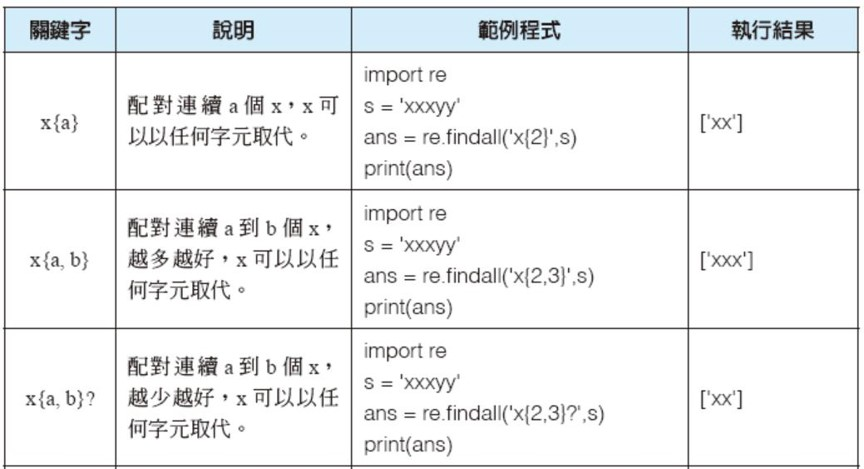

In [35]:
Image('images/9-3-2-c2.jpg', width=480, height=None)

In [36]:
import re
s = '昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。'
print(s)

# [xyz]{n}: match exact n times of x, y or z
ans = re.findall('[黃鶴樓]{2}',s)
print("re.findall('[黃鶴樓]{2}',s):", ans)
print()

昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.findall('[黃鶴樓]{2}',s): ['黃鶴', '黃鶴', '黃鶴']



In [37]:
# [xyz]{m,n}:  match sequences of x, y, or z that appear between m and n times consecutively
print(s)

ans = re.findall('[黃鶴樓]{1,}',s)
print("re.findall('[黃鶴樓]{1,}',s):", ans)
print()

昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.findall('[黃鶴樓]{1,}',s): ['黃鶴', '黃鶴樓', '黃鶴']



In [38]:
# [xyz]{m,n}?: match sequences of x, y, or z that appear between m and n times consecutively, as few repetitions as possible 
print(s)

ans = re.findall('[黃鶴樓]{1,2}?',s)
print("re.findall('[黃鶴樓]{1,2}?',s):", ans)
print()

昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.findall('[黃鶴樓]{1,2}?',s): ['黃', '鶴', '黃', '鶴', '樓', '黃', '鶴']



In [43]:
# https://regex101.com/r/yhrWWb/1
# re.finditer returns a list of matched objects with matched groups
# (?: ): non-capturing group
# .*: greedy substring, as long as possible
# ([黃鶴樓]+?): capturing group, one to many chars, as few as possible (lazy)

import re
s = '昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。'
print(s)

matches = re.finditer('(?:.*([黃鶴樓]+?))',s)
print("re.finditer('(.*(([黃鶴樓]+?))',s):")
for m in matches:
  print(f'match content: {m.group()}, group 1: {m.group(1)}')
print()

昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.finditer('(.*(([黃鶴樓]+?))',s):
match content: 昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴, group 1: 鶴



In [45]:
# https://regex101.com/r/bhGu9p/1 
# (?: ): Non-capturing group 
# # .*: greedy substring, as long as possible
# ([黃鶴樓]{2}): capturing group, exact two chars
print(s)

matches = re.finditer('(?:.*([黃鶴樓]{2}))',s)
print("re.finditer('(?:.*(([黃鶴樓]{2}))',s):")
for m in matches:
  print(f'match content: {m.group()}, group 1: {m.group(1)}')
print()


昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴一去不復返，白雲千載空悠悠。
re.finditer('(?:.*(([黃鶴樓]{2}))',s):
match content: 昔人已乘黃鶴去，此地空餘黃鶴樓。黃鶴, group 1: 黃鶴



In [39]:
# whole word only search https://regex101.com/r/YoVIX1/1

import re

s2 = 'This island is really beautiful'
print(s2,'\n')

print(r"Whole words only search using \bword\b")
print(r"re.findall(r'\bis\b', s):", re.findall(r'\bis\b', s2))
print()

print(r"Whole words only search using \b\w{n}\b")
print(r"re.findall(r'\b\w{6}\b, s):", re.findall(r'\b\w{6}\b', s2))

This island is really beautiful 

Whole words only search using \bword\b
re.findall(r'\bis\b', s): ['is']

Whole words only search using \b\w{n}\b
re.findall(r'\b\w{6}\b, s): ['island', 'really']


#### [..]\* (greegy) vs. [..]\*? (lazy)

In [40]:
# https://regex101.com/r/ZeBpfF/1

import re

# [..]*: 0 or many times of chars, prefer longer substring (greedy)
pat2 = '[ab]*' 
string = 'abcdefabcab'
result = re.findall(pat2, string)
print("re.findall('[ab]*', string):\n", result)

re.findall('[ab]*', string):
 ['ab', '', '', '', '', 'ab', '', 'ab', '']


In [41]:

# [..]*?: 0 or many times of characters, prefer shorter substring  (lazy)
pat1 = '[ab]*?'
string = 'abcdefabcab'
print("s = ", string, end='\n')
print()

result = re.findall(pat1, string)
print("re.findall('[ab]*?', string):\n", result)
print()

s =  abcdefabcab

re.findall('[ab]*?', string):
 ['', 'a', '', 'b', '', '', '', '', '', 'a', '', 'b', '', '', 'a', '', 'b', '']



In [144]:
# coding=utf8
# code automatically generated by regex101

import re

regex = r"[ab]*?"

test_str = "abcdefabcab"
matches = re.finditer(regex, test_str, re.MULTILINE)

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        
        print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))


Match 1 was found at 0-0: 
Match 2 was found at 0-1: a
Match 3 was found at 1-1: 
Match 4 was found at 1-2: b
Match 5 was found at 2-2: 
Match 6 was found at 3-3: 
Match 7 was found at 4-4: 
Match 8 was found at 5-5: 
Match 9 was found at 6-6: 
Match 10 was found at 6-7: a
Match 11 was found at 7-7: 
Match 12 was found at 7-8: b
Match 13 was found at 8-8: 
Match 14 was found at 9-9: 
Match 15 was found at 9-10: a
Match 16 was found at 10-10: 
Match 17 was found at 10-11: b
Match 18 was found at 11-11: 


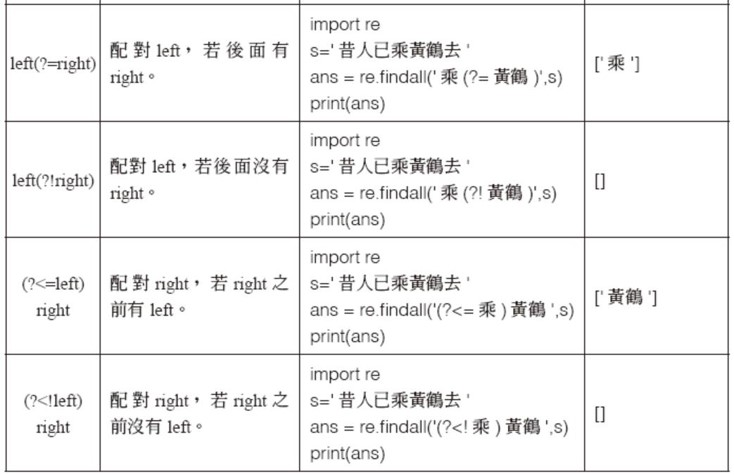

In [145]:
Image('images/9-3-2-c3.jpg', width=480, height=None)

In [42]:
# https://regex101.com/r/oEYKUL/1
# left(?=right): 配對 left, 如果後面有right. matched object 不含 right
# Positive Lookahead (?=right)
ans = re.findall('黃鶴(?=樓)',s)
print("re.findall('黃鶴(?=樓)', s):", ans)
print()

# left(?!right): 配對 left, 如果後面沒有right
# Negative Lookahead (?!right)
ans = re.findall('黃鶴(?!樓)',s)
print("re.findall('黃鶴(?!樓)', s)", ans)
print()

# (?<=left)right: 配對 right, 如果前面有left
# Positive Lookbehind (?<=left)right
ans = re.findall('(?<=黃鶴)樓',s)
print("re.findall('(?<=黃鶴)樓',s)', s)", ans)
print()

# (?<!left)right: 配對 right, 如果前面沒有left
# Negative Lookbehind (?<!left)right
ans = re.findall('(?<!黃鶴)樓',s)
print("re.findall('(?<!黃鶴)樓',s)", ans)
print()

re.findall('黃鶴(?=樓)', s): ['黃鶴']

re.findall('黃鶴(?!樓)', s) ['黃鶴', '黃鶴']

re.findall('(?<=黃鶴)樓',s)', s) ['樓']

re.findall('(?<!黃鶴)樓',s) []



Create strong password that

+ Starts at the beginning of the string.

+ Contains at least one uppercase letter.

+ Contains at least one lowercase letter.

+ Contains at least one digit.

+ Contains at least one special character from the specified set.

+ Is at least 8 characters long.

+ Ends at the end of the string.

r"`^(?=.*[A-Z])(?=.*[a-z])(?=.*\d)(?=.*[-+_!@#$%^&*.,?]).{8,}$`"

1. `^`: Asserts the position at the start of the string.

2. `(?=.*[A-Z])`: Positive lookahead assertion that requires at least one uppercase letter.

3. `(?=.*[a-z])`: Positive lookahead assertion that requires at least one lowercase letter.

4. `(?=.*\d)`: Positive lookahead assertion that requires at least one digit.

5. `(?=.*[-+_!@#$%^&*.,?])`: Positive lookahead assertion that requires at least one special character from the specified set.

5. `.{8,}`: Matches any character (except newline) at least 8 times.

6. `$`: Asserts the position at the end of the string.

In [26]:
import re

# Define the regular expression
regex = r"^(?=.*[A-Z])(?=.*[a-z])(?=.*\d)(?=.*[-+_!@#$%^&*.,?]).{8,}$"

# Example usage:
valid_input = "Ab3Hello#"

if re.match(regex, valid_input):
    print("The input string meets the criteria.")
else:
    print("The input string does not meet the criteria.")


The input string meets the criteria.


In [28]:
import re

def validate_password(input_string):
    # Check for at least one uppercase letter
    if not any(c.isupper() for c in input_string):
        return False

    # Check for at least one lowercase letter
    if not any(c.islower() for c in input_string):
        return False

    # Check for at least one digit
    if not any(c.isdigit() for c in input_string):
        return False

    # Check for at least one special character
    special_chars = "-+_!@#$%^&*.,?"
    if not any(c in special_chars for c in input_string):
        return False

    # Check minimum length
    if len(input_string) < 8:
        return False

    return True

# Example usage:
input_password = "Ab3#Hello"
if validate_password(input_password):
    print("The input string meets the criteria.")
else:
    print("The input string does not meet the criteria.")


The input string meets the criteria.
